#Heart Disease Prediction with ML

In this notebook, machine learning algorithms are explored to accurately predict whether a patient suffer from heart disease. The data used for this project is relatively small, and can be downloaded from here, courtesy- UCI Heart Disease dataset.

We are going to explore the dataset, observe the significance as well as trends of each variable with respect to the target variable - and observe the performance of different ML algorithms by training them on identical datasets.

#Set UP

Setting up the environment by importing required libraries and loading the dataset.

In [18]:
import seaborn as seas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
seas.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Importing Required Models and Metrics

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Loading the dataset (available in repository) and observing its contents.

In [10]:
dataset = pd.read_csv("heart.csv")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The ditribution of the target/lable variable:

Has Heart Disease (target = 1)

Does not have Heart Disease (target = 0)

#Getting to know the data better

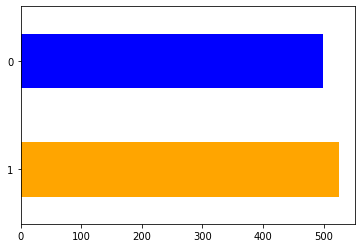

In [11]:
dataset.target.value_counts().plot(kind = "barh", color = ["orange", "blue"])

In this dataset, we have:

499 cases without heart disease (target = 0)

526 cases with heart disease (target = 1)

Here is a brief description of the dataset and its various fields: (14 columns, 1025 data records)


age - age of the patient

sex - gender of the patient

cp - chest pain: has 4 distinct values

trestbps - resting blood pressure

chol - serum cholesterol in mg/dl

fbs - fasting blood sugar: whether it is greater than 120 mg/dl or not

restecg - resting electrocardiographic results: has 3 distinct values:: 0, 1, 2

thalach - maximum heart rate achieved

exang - exercise induced angina

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major blood vessels (0 - 3) colored by flouroscopy

thal - values: 3 - normal , 6 - fixed defect , 7 - reversible effect

target - label variable for supervised learning: 0 - patient does not have heart disease ; 1 - patient has heart disease

Check for null/void data records so that necessary imputations can be done.

In [12]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No imputations are necessary as there are no empty/void records.

Checking for the type of data contained in each field. Although described earlier, it is always better to take a look. Particularly, which fields contain categorical data, real value/ floating point values or string/character values.

In [13]:
# function definition for taking a look at the distinct variety of data under each field 
def data_viewer(df):
    category_field = [] # fields of categorical kind
    real_field = [] # fields of continuous/ real values
    for col in df.columns:
        if (len(df[col].unique()) <= 10 ): # setting 10 as threshold for unique kind of values -> category_field
            category_field.append(str(col))
        else:
            real_field.append(str(col))
    return (category_field, real_field)

In [14]:
category_columns, realValue_columns = data_viewer( dataset )
print("Category Columns: {}".format(category_columns))
print("realValue Columns: {}".format(realValue_columns))

Category Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
realValue Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


The dataset has:

9 fields containing categorical data: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'

5 fields containing real value data: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

#Observing the trends in the Categorical fields wrt Target variable

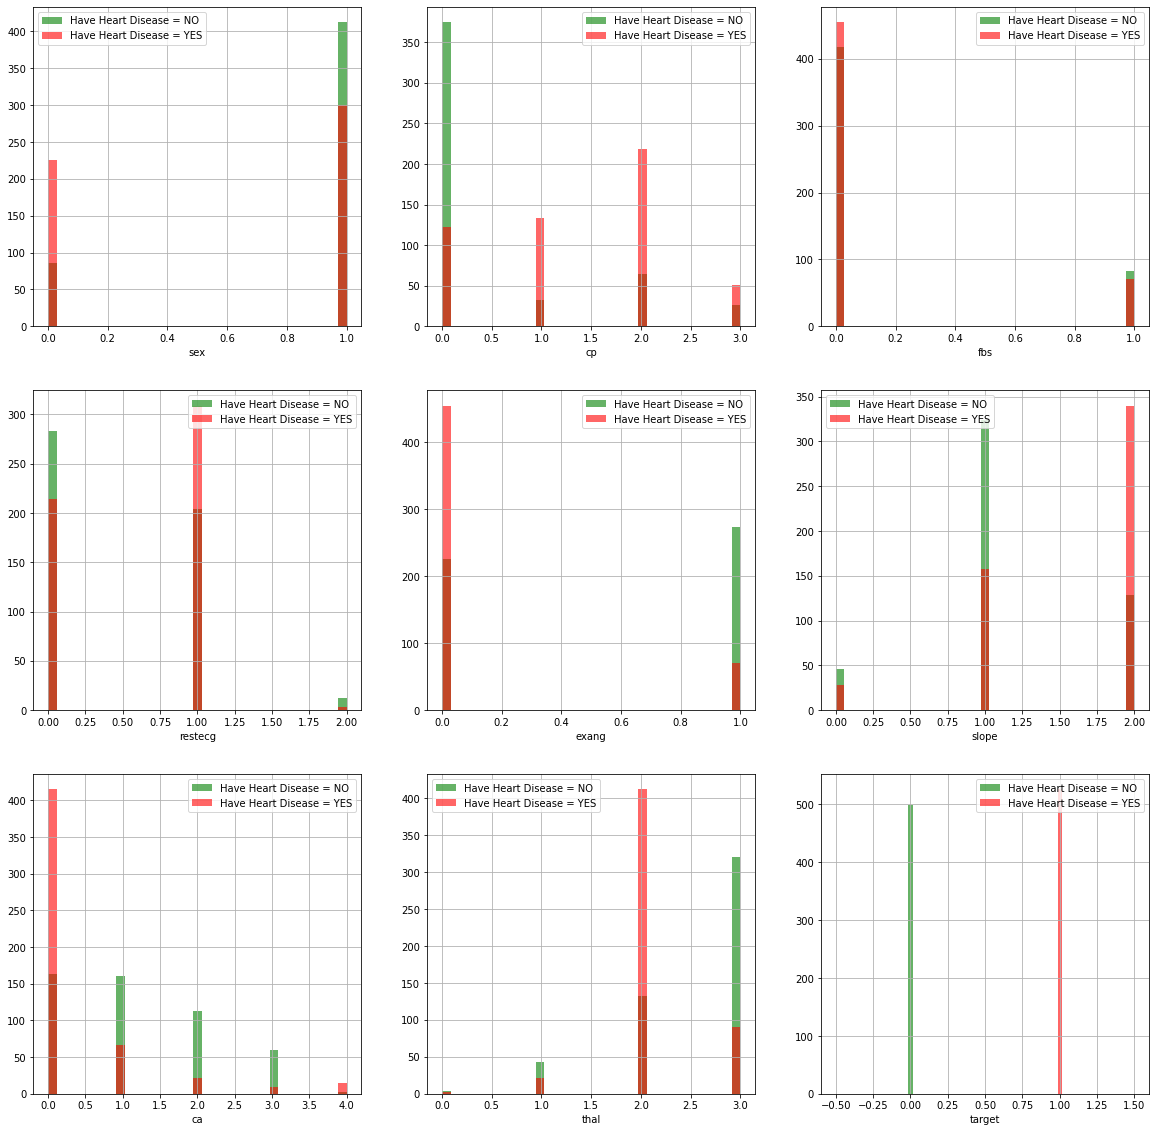

In [15]:
plt.figure(figsize = (20, 20))

for x, cat_col in enumerate( category_columns, 1):
    plt.subplot(3, 3, x)
    dataset[dataset["target"] == 0][cat_col].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["target"] == 1][cat_col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(cat_col)

#Observations:

cp (Chest pain): Patients with values 1, 2, 3 have a higher chance of heart disease.

restecg (resting ECG): value of 1 - abnormal heart rhythm - having highest chance of heart disease compared to other values.

exang (exercise-induced angina): patients of value 0 (No angina by exercise) have have higher chances of heart disease rather than those of value 1.

slope {the slope of the ST segment of peak exercise}: Patients with value 2 - are more likely to have heart disease than those with value of 0 or 1.

ca (no. of major vessels stained by fluoroscopy): Patients with value 0 have the highest chance of heart disease.

thal: patients with value of 2 are at more risk of developing heart disease.

#Observing trends in the fields with Real value wrt Target variable

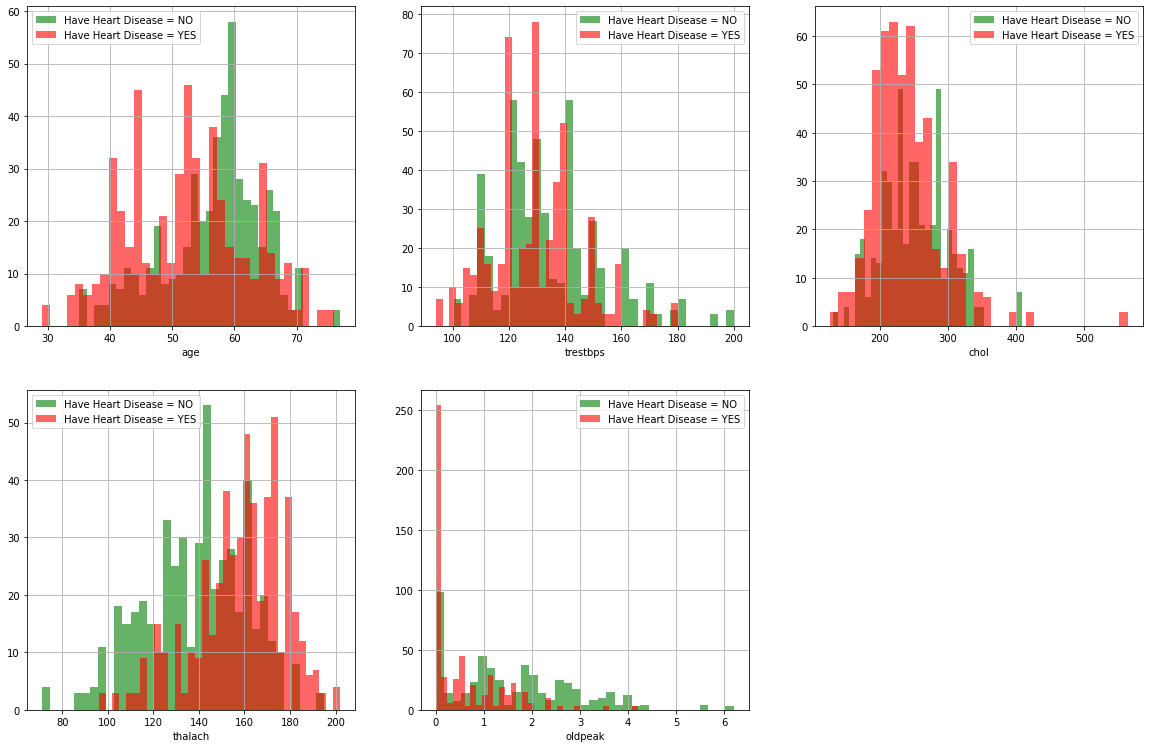

In [16]:
plt.figure(figsize = (20, 20))

for x, r_col in enumerate(realValue_columns, 1):
    plt.subplot(3, 3, x)
    dataset[dataset["target"] == 0][r_col].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["target"] == 1][r_col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(r_col)

#Observing Overall trends wrt to multiple variables
To get a better idea of the inter-relationship of the different variables and how their combined effect realte to the target variable, its a good practice to observe the correlation between the variables.

(14.5, -0.5)

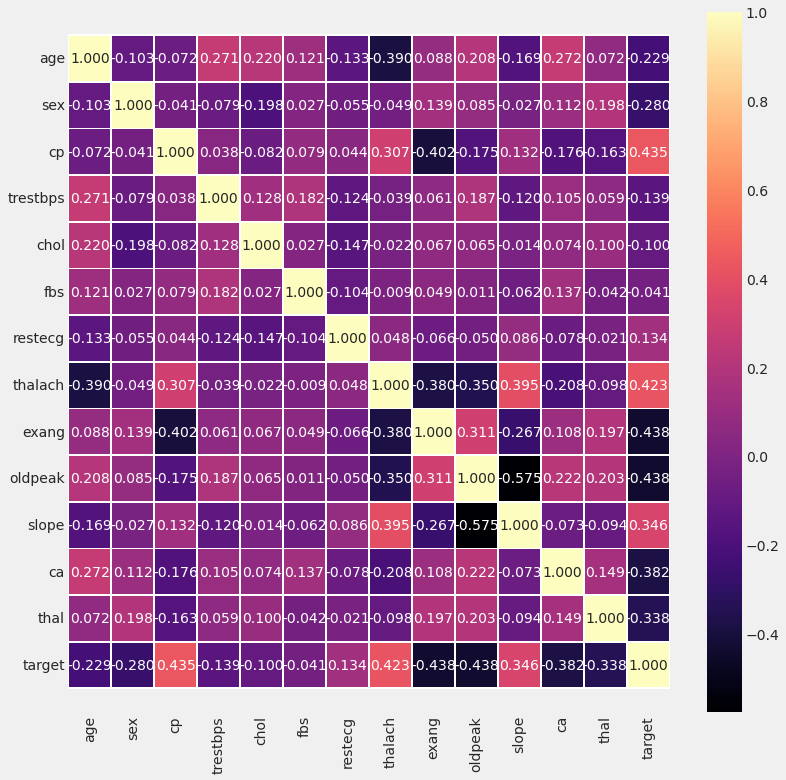

In [19]:
# plot a correlation matrix to get an
# idea of the inter-relationship between fields

correlationMatrix = dataset.corr()

fig, axes = plt.subplots(figsize=(12, 12))
axes = seas.heatmap( correlationMatrix, annot = True, linewidths = 0.75, fmt=".3f", cmap="magma");

lowerEdge, upperEdge = axes.get_ylim()
axes.set_ylim(lowerEdge + 0.5, upperEdge - 0.5)

The above heatmap illustrates the correlation between the various variables. Relatively, strong +ve correlations are observed between the following:

thalach :: target
slope :: target
Relatively strong -ve correlations are observed between the following:

exang :: target
oldpeak :: target
The below graph summarizes the correlation of the raw-variables with the target variable.

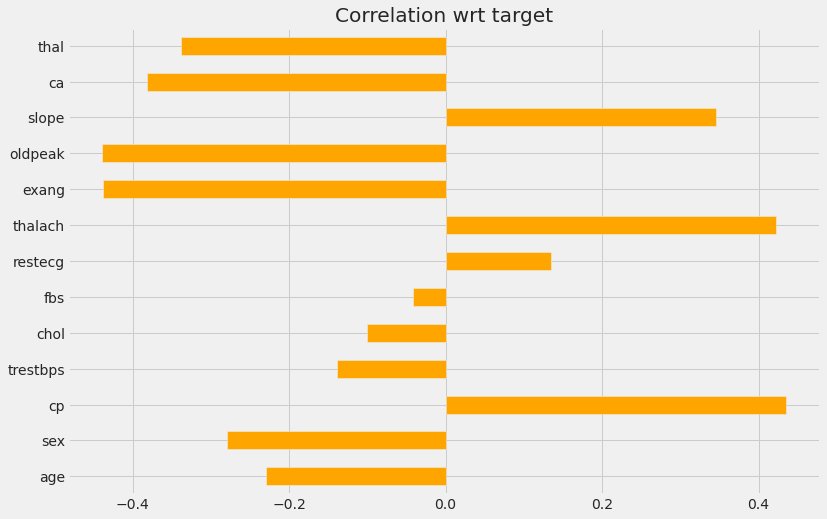

In [20]:
# correlation wrt to Target variable
dataset.drop('target', axis = 1).corrwith(dataset.target).plot(kind = 'barh', grid = True, figsize = (12, 8), title = "Correlation wrt target", color = "orange")


Most variables depict a negative correlation with the target variable. Variables 'thalach', 'restecg', 'cp' show a positive correlation.

#Observing trends in variables wrt +ve and -ve cases of Heart Disease

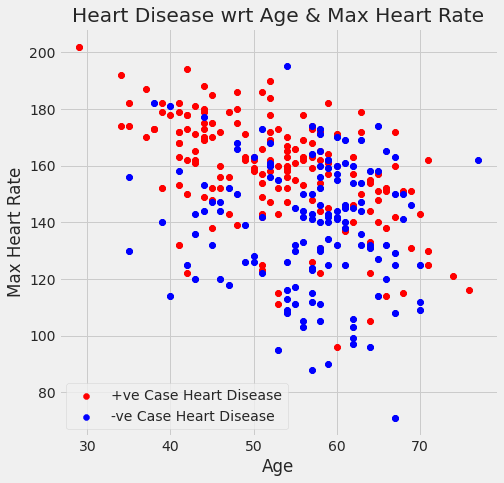

In [21]:
# Plot to describe relation between occurence of Heart Disease wrt Age and Max Heart rate
plt.figure(figsize=(7, 7))

# Scatter plot for positive cases of Heart disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="red")

# Scatter plot for negative cases of Heart Disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="blue")

# Graph Description
plt.title("Heart Disease wrt Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["+ve Case Heart Disease", "-ve Case Heart Disease"]);

#Observing trends on +ve and -ve cases of Heart Disease individually

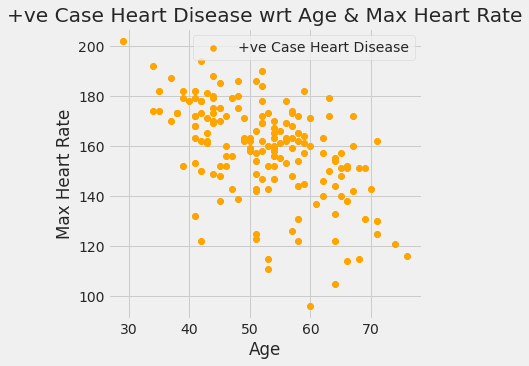

In [22]:
# Plot to describe relation between -ve case of Heart Disease wrt Age and Max Heart rate
plt.figure(figsize=(5, 5))

# Scatter plot for negative cases of Heart Disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="orange")

# Graph Description
plt.title("+ve Case Heart Disease wrt Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["+ve Case Heart Disease"]);

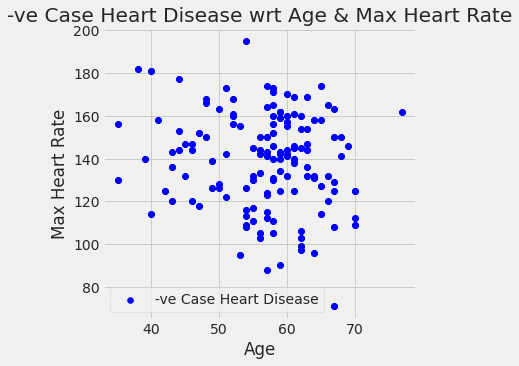

In [23]:
# Plot to describe relation between -ve case of Heart Disease wrt Age and Max Heart rate
plt.figure(figsize=(5, 5))

# Scatter plot for negative cases of Heart Disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="blue")

# Graph Description
plt.title("-ve Case Heart Disease wrt Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["-ve Case Heart Disease"]);

Out of all the variables with weak -ve correlation: ("restecg", "fbs", "chol", "trestbps"). "chol" and "trestbps" are real value fields, while "fbs" and "restecg" are categorical fields. In order to derive valuable information out of "chol" and "trestbps", we need to observe their trends. Observing the correlation of derived variables with the target variable.

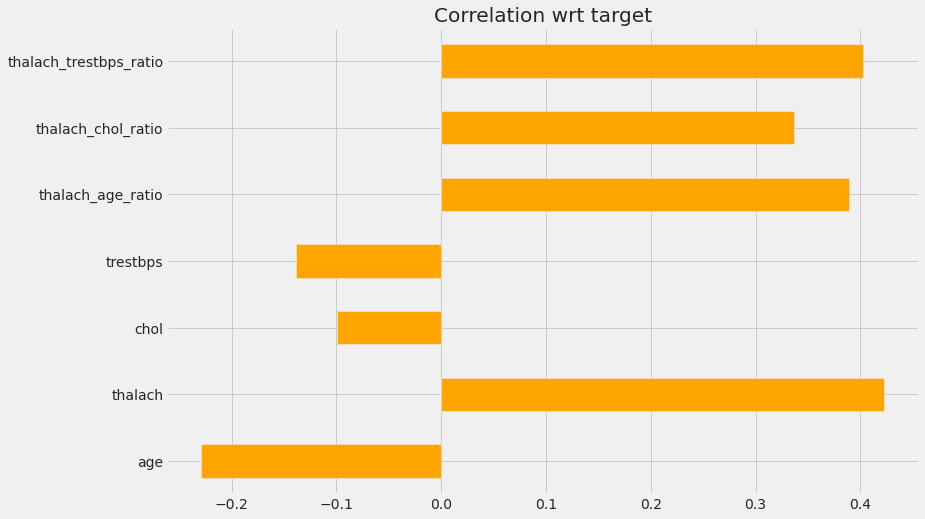

In [24]:
#print(realValue_columns)
dummyDataset = dataset[["target", "age", "thalach", "chol", "trestbps"]]
dummyDataset["thalach_age_ratio"] = (dummyDataset["thalach"]/ dummyDataset["age"])
dummyDataset["thalach_chol_ratio"] = (dummyDataset["thalach"]/ dummyDataset["chol"])
dummyDataset["thalach_trestbps_ratio"] = (dummyDataset["thalach"]/ dummyDataset["trestbps"])
dummyDataset.drop('target', axis = 1).corrwith(dummyDataset.target).plot(kind = 'barh', grid = True, figsize = (12, 8), title = "Correlation wrt target", color = "orange")


#Data Processing
Incorporating new derived variables and doing some pre-processing on the remainder variables, like Normalizing them.

In [25]:
dataset
"""
realValue_columns.remove("thalach_age_ratio");
realValue_columns.remove("thalach_chol_ratio");
realValue_columns.remove("thalach_trestbps_ratio")
realValue_columns
"""
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Splitting the Dataset into Train/Test datasets and training a Min-Max scaler on the training dataset. This trained scaler then is used to transform the Train/test datasets.

NOTE: The scaler is not trained on the entire dataset (train + test), as it would expose valuable information in the train dataset to the test data - which ccould compromise the performance of the model.

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

#incorporating the derived variables
dataset["thalach_age_ratio"] = (dataset["thalach"]/ dataset["age"])
dataset["thalach_chol_ratio"] = (dataset["thalach"]/ dataset["chol"])
dataset["thalach_trestbps_ratio"] = (dataset["thalach"]/ dataset["trestbps"])

# splitting the dataset into train-test data
X = dataset.drop('target', axis=1)
y = dataset.target

# splitting Training and Testing dataset in 70 - 30 ratio respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 99)

# realValue Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# training the scaler on the real valued columns for the training data
realValue_columns = realValue_columns + ["thalach_age_ratio", "thalach_chol_ratio", "thalach_trestbps_ratio"]
X_train[realValue_columns] = scaler.fit_transform( X_train[realValue_columns] )

#transforming the test dataset
X_test[realValue_columns] = scaler.transform( X_test[realValue_columns] )

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,thalach_age_ratio,thalach_chol_ratio,thalach_trestbps_ratio
418,0.687500,0,0,0.283019,0.189498,0,1,0.702290,0,0.000000,2,0,2,0.265726,0.455525,0.564921
163,0.395833,1,0,0.283019,0.337900,0,0,0.725191,0,0.080645,1,0,3,0.406147,0.295734,0.582769
263,0.541667,0,1,0.358491,0.493151,0,1,0.725191,0,0.193548,2,0,2,0.331619,0.185153,0.522913
231,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,0.358777,0.431963,0.689465
560,0.604167,0,0,0.339623,0.162100,0,1,0.458015,0,0.096774,1,0,2,0.203007,0.350020,0.338562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.770833,0,3,0.528302,0.228311,0,1,0.328244,0,0.419355,0,0,2,0.113036,0.202636,0.155827
168,0.291667,1,2,0.339623,0.431507,0,1,0.694656,0,0.306452,2,1,2,0.458487,0.211688,0.514486
185,0.583333,1,0,0.669811,0.372146,1,0,0.404580,0,0.161290,1,3,3,0.188922,0.133456,0.149567
35,0.354167,1,2,0.528302,0.239726,0,1,0.580153,0,0.580645,1,0,2,0.361669,0.323755,0.318132


Definition of a helper function for printing classification report of performance of the ML model

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def modelPerformancedescribe(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        model_performance = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Model Training Result:\n*******************************************")
        print(f"Prediction Accuracy Score: {accuracy_score(y_train, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"Disease Prediction:\n{model_performance}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        model_performance = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Model Prediction Result on the Test Data:\n*******************************************")
        print(f"Prediction Accuracy Score: {accuracy_score(y_test, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"Disease Prediction Report:\n{model_performance}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#Train/Test of the Model
We will train and test our model based on the logistic regression algorithm and determine its performance.

In [30]:
from sklearn.linear_model import LogisticRegression

ml_model = LogisticRegression(solver='liblinear')
# using ‘liblinear’ solver as :
# it supports both L1 and L2 regularization
# with a dual formulation only for the L2 penalty.

ml_model.fit(X_train, y_train)

modelPerformancedescribe(ml_model, X_train, y_train, X_test, y_test, train=True)
modelPerformancedescribe(ml_model, X_train, y_train, X_test, y_test, train=False)

Model Training Result:
*******************************************
Prediction Accuracy Score: 84.878%
_______________________________________________
Disease Prediction:
                    0           1  accuracy   macro avg  weighted avg
precision    0.874101    0.827893   0.84878    0.850997      0.850509
recall       0.807309    0.888535   0.84878    0.847922      0.848780
f1-score     0.839378    0.857143   0.84878    0.848261      0.848448
support    301.000000  314.000000   0.84878  615.000000    615.000000
_______________________________________________
Confusion Matrix: 
 [[243  58]
 [ 35 279]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 85.122%
_______________________________________________
Disease Prediction Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.895954    0.818565   0.85122    0.857260      0.855938
recall       0.782828    0.915094   0.85122    0.848

The logisitic regression model has an accuracy of 84.9% on the train dataset and 85.1% on the test data set. Let us explore other algorithms for better performance.

In [31]:
# save the logistic regression classifier

import pickle
# saving to a file
with open('HeartDisease_LogisticPredictor.pkl', 'wb') as f:
    pickle.dump(ml_model, f)

"""
# loading the model later
with open('HeartDisease_LogisticPredictor.pkl', 'rb') as f:
    clf = pickle.load(f)
"""

"\n# loading the model later\nwith open('HeartDisease_LogisticPredictor.pkl', 'rb') as f:\n    clf = pickle.load(f)\n"

#Evaluating the performance of a model on a tree based algorithm: Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier().fit(X_train, y_train)
modelPerformancedescribe(decisionTreeModel, X_train, y_train, X_test, y_test, train=True)
modelPerformancedescribe(decisionTreeModel, X_train, y_train, X_test, y_test, train=False)

Model Training Result:
*******************************************
Prediction Accuracy Score: 100.000%
_______________________________________________
Disease Prediction:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    301.0  314.0       1.0      615.0         615.0
_______________________________________________
Confusion Matrix: 
 [[301   0]
 [  0 314]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 98.293%
_______________________________________________
Disease Prediction Report:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.968037  0.982927    0.984018      0.983473
recall       0.964646    1.000000  0.982927    0.982323      0.982927
f1-score     0.982005    0.983759  0

In [33]:
from sklearn.svm import SVC

# We will use a Support Vector Machine based model with RBF kernel
# Further, we will change the parameter of "gamma" and 'C' in the model argument to observe its performance

for this_gamma in [0.02, 0.03, 0.04, 0.05, 0.1, 0.5]:
    for this_C in [ 0.1, 0.2, 1, 1.5]:
        print("*******************************************\nParameters:: Gamma: {} , C: {}".format(this_gamma, this_C))
        svm_Model = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=True)
        modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=False)     

*******************************************
Parameters:: Gamma: 0.02 , C: 0.1
Model Training Result:
*******************************************
Prediction Accuracy Score: 83.252%
_______________________________________________
Disease Prediction:
                    0           1  accuracy   macro avg  weighted avg
precision    0.861314    0.809384   0.83252    0.835349       0.83480
recall       0.784053    0.878981   0.83252    0.831517       0.83252
f1-score     0.820870    0.842748   0.83252    0.831809       0.83204
support    301.000000  314.000000   0.83252  615.000000     615.00000
_______________________________________________
Confusion Matrix: 
 [[236  65]
 [ 38 276]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 84.634%
_______________________________________________
Disease Prediction Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.899408    0.809129  0.846341 

In [34]:
from sklearn.svm import SVC

# We will use a Support Vector Machine based model with RBF kernel
# Further, we will change the parameter of "gamma" and 'C' in the model argument to observe its performance

for this_gamma in [0.02, 0.03, 0.04, 0.05, 0.1, 0.5]:
    for this_C in [ 0.1, 0.2, 1, 1.5]:
        print("*******************************************\nParameters:: Gamma: {} , C: {}".format(this_gamma, this_C))
        svm_Model = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=True)
        modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=False)   

*******************************************
Parameters:: Gamma: 0.02 , C: 0.1
Model Training Result:
*******************************************
Prediction Accuracy Score: 83.252%
_______________________________________________
Disease Prediction:
                    0           1  accuracy   macro avg  weighted avg
precision    0.861314    0.809384   0.83252    0.835349       0.83480
recall       0.784053    0.878981   0.83252    0.831517       0.83252
f1-score     0.820870    0.842748   0.83252    0.831809       0.83204
support    301.000000  314.000000   0.83252  615.000000     615.00000
_______________________________________________
Confusion Matrix: 
 [[236  65]
 [ 38 276]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 84.634%
_______________________________________________
Disease Prediction Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.899408    0.809129  0.846341 

Decision Tree has a traning accuracy of 100% and testing accuracy of 98% which is the best among other models